20170714_SypGFP_msp300_r11_HRP_DAPI_p2s5r_highMag_n2_crop.tif , format = (39, 4, 204, 953)
Pearson coef, pvalue: (0.0011667984769677588, 0.60692782808274492)


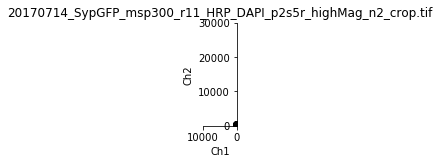

In [3]:
# Pearson correlation coefficient for quantifying colocalisation of diffuse signal in images

import os
import tifffile
import pandas as pd
from scipy import stats
import random
import matplotlib.pyplot as plt
%matplotlib inline 

# specify directory of images
indir = ('/Users/joshtitlow/tmp/coloc/syp_coloc/')
infiles = os.listdir(indir)

# create a figure and start counting
fig = plt.figure(figsize = (10,10))
n = 1

# create a df and a list to store filename and PCC values
df = pd.DataFrame()
filename = []
PCC = []


# analyse each file in the directory
for file in infiles: 
    if file.endswith('.tif'):
        if not file.startswith('._'):
            
            # read image file and show data structure
            im = tifffile.imread(os.path.join(indir, file))
            print file, ', format =', im.shape
            filename.append(file)
            
            # choose focal plane and load channels into a flattened array
            focus = im.shape[0]/2
            ch1 = im[focus, 1].flatten()
            ch2 = im[focus, 2].flatten()
            ch1_random = random.shuffle(ch1)
            
            # Perform pearson correlation analysis (returns coefficient and p-value)
            pearson = stats.pearsonr(ch1, ch2)
            print 'Pearson coef, pvalue:', pearson
            PCC.append(pearson[0])
        
            # plot the data
            #ax = plt.subplot(111)
            ax = fig.add_subplot(5,5,n)
            ax.scatter(ch1,ch2, c='black', alpha=0.5)
            ax.set_title(file)
            ax.set_xlabel('Ch1')
            ax.set_ylabel('Ch2')
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            plt.xlim(0, 10000)
            plt.ylim(0, 30000)
            
            # iterate
            n+=1

# plot the data and save results
plt.tight_layout()

#plt.savefig('PCC_figs.png')
plt.show(fig)


df['filename'] = filename
df['PCC'] = PCC
#df.to_csv('PCC_values.csv', index=False)

In [1]:
im.shape

NameError: name 'im' is not defined

In [11]:
focus = im.shape[0]/2
focus

19

In [16]:
im[18, 2]

array([[ 24,  22,  24, ..., 111,  45,  53],
       [ 18,  28,  20, ...,  32,  63,  57],
       [ 20,  26,  23, ...,  87,  26,  42],
       ..., 
       [ 21,  14,  17, ...,  74,  96,  98],
       [ 25,  19,  30, ...,  63,  86,  49],
       [ 22,  27,  23, ...,  55,  51,  61]], dtype=uint16)

In [13]:
ch1

array([344,  62, 225, ..., 146,  63, 103], dtype=uint16)